In [1]:
import nibabel as nib
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_files = pd.read_csv("../train.csv")
test_files = pd.read_csv("../test.csv")

In [3]:
train_files["Type"] = train_files["filepath"].str.rstrip(".nii.gz").str.rsplit("-", 1).str[1]
test_files["Type"] = test_files["filepath"].str.rstrip(".nii.gz").str.rsplit("-", 1).str[1]

In [4]:
T1_train_files = train_files[train_files["Type"] == "T1"].index.values
T2_train_files = train_files[train_files["Type"] == "T2"].index.values
PD_train_files = train_files[train_files["Type"] == "PD"].index.values

T1_test_files = test_files[test_files["Type"] == "T1"].index.values
T2_test_files = test_files[test_files["Type"] == "T2"].index.values
PD_test_files = test_files[test_files["Type"] == "PD"].index.values

In [5]:
T1_test_files, T2_test_files, PD_test_files

(array([4, 6, 8]), array([1, 5, 7, 9]), array([0, 2, 3]))

In [6]:
path_to_train_data = Path("../../MIA/train/data")
path_to_train_noisy = Path("../../MIA/train/noisy")
path_to_test_data = Path("../../MIA/test/data")
path_to_test_noisy = Path("../../MIA/test/noisy")

## get the histograms of all types in train and test

## T1
T1_train_imgs_data = []
T1_train_imgs_noisy = []

for file_index in T1_train_files:
    # get data image
    filepath = path_to_train_data / f"{file_index+1}.nii.gz"
    img = nib.load(filepath).get_fdata()
    
    T1_train_imgs_data.append(img.flatten())
    
    # get noisy image
    filepath = path_to_train_noisy / f"{file_index+1}.nii.gz"
    img = nib.load(filepath).get_fdata()
    T1_train_imgs_noisy.append(img.flatten())
    
## T2
T2_train_imgs_data = []
T2_train_imgs_noisy = []

for file_index in T2_train_files:
    # get data image
    filepath = path_to_train_data / f"{file_index+1}.nii.gz"
    img = nib.load(filepath).get_fdata()
    
    T2_train_imgs_data.append(img.flatten())
    
    # get noisy image
    filepath = path_to_train_noisy / f"{file_index+1}.nii.gz"
    img = nib.load(filepath).get_fdata()
    T2_train_imgs_noisy.append(img.flatten())
    
## PD
PD_train_imgs_data = []
PD_train_imgs_noisy = []

for file_index in PD_train_files:
    # get data image
    filepath = path_to_train_data / f"{file_index+1}.nii.gz"
    img = nib.load(filepath).get_fdata()
    
    PD_train_imgs_data.append(img.flatten())
    
    # get noisy image
    filepath = path_to_train_noisy / f"{file_index+1}.nii.gz"
    img = nib.load(filepath).get_fdata()
    PD_train_imgs_noisy.append(img.flatten())

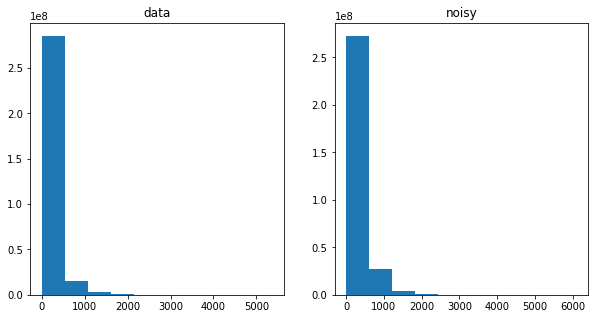

In [7]:
## plot the hisogram of values for each
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].hist(np.concatenate(T1_train_imgs_data, axis=0))
ax[0].set_title("data")
ax[1].hist(np.concatenate(T1_train_imgs_noisy, axis=0))
ax[1].set_title("noisy")
plt.show()

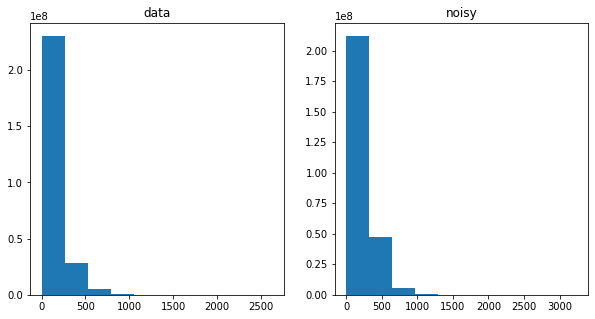

In [8]:
## plot the hisogram of values for each
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].hist(np.concatenate(T2_train_imgs_data, axis=0))
ax[0].set_title("data")
ax[1].hist(np.concatenate(T2_train_imgs_noisy, axis=0))
ax[1].set_title("noisy")
plt.show()

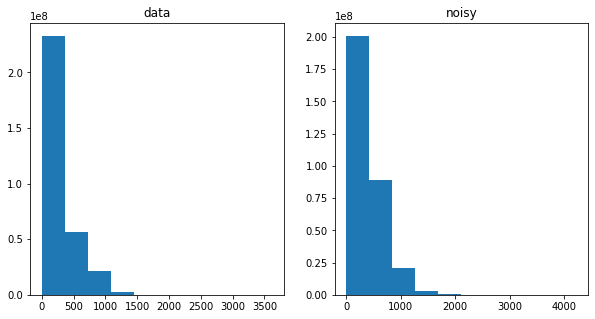

In [9]:
## plot the hisogram of values for each
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].hist(np.concatenate(PD_train_imgs_data, axis=0))
ax[0].set_title("data")
ax[1].hist(np.concatenate(PD_train_imgs_noisy, axis=0))
ax[1].set_title("noisy")
plt.show()
